In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('ggplot')


## loading of datasets

In [9]:
transaction = pd.read_excel('C:\\Users\\Oladeji\\Downloads\\QVI_transaction_data(1).xlsx')

In [10]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
purchasing = pd.read_csv('C:\\Users\\Oladeji\\Downloads\\QVI_purchase_behaviour.csv')

In [13]:
purchasing.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## merging of datasets

In [14]:
data = pd.merge(transaction, purchasing, how = 'right', on = 'LYLTY_CARD_NBR')

In [15]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


## checking of data accuracy

In [19]:
for column in data.columns:
    not_null = np.mean(data[column].isnull())
    print('{} - {}%'.format(column, not_null))

DATE - 0.0%
STORE_NBR - 0.0%
LYLTY_CARD_NBR - 0.0%
TXN_ID - 0.0%
PROD_NBR - 0.0%
PROD_NAME - 0.0%
PROD_QTY - 0.0%
TOT_SALES - 0.0%
LIFESTAGE - 0.0%
PREMIUM_CUSTOMER - 0.0%


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [27]:
data.dtypes

DATE                  int64
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [29]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [34]:
data.nunique().sort_values(ascending = False)

TXN_ID              263127
LYLTY_CARD_NBR       72637
DATE                   364
STORE_NBR              272
PROD_NBR               114
PROD_NAME              114
TOT_SALES              112
LIFESTAGE                7
PROD_QTY                 6
PREMIUM_CUSTOMER         3
dtype: int64

In [33]:
data.shape

(264836, 10)

## cleaning of data

In [35]:
data.drop(['LYLTY_CARD_NBR', 'STORE_NBR', 'PROD_NBR', 'TXN_ID'], inplace = True, axis = 1)

In [37]:
data.rename(columns = {'PROD_NAME':'PRODUCT', 'TOT_SALES':'SALES', 'PROD_QTY':'QUANTITY'}, inplace = True)

In [39]:
data.rename(columns = {'PREMIUM_CUSTOMER':'CUSTOMER_CATEGORY'}, inplace = True)

In [40]:
data.head()

,DATE,PRODUCT,QUANTITY,SALES,LIFESTAGE,CUSTOMER_CATEGORY
0,43390,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


## total revenue realize

In [41]:
revenue = data['SALES'].sum()

In [44]:
print('TOTAL REVENUE:', revenue)

TOTAL REVENUE: 1934414.9999999995


## TOTAL REVENUE GENERATE BY CUSTOMER CATEGORY

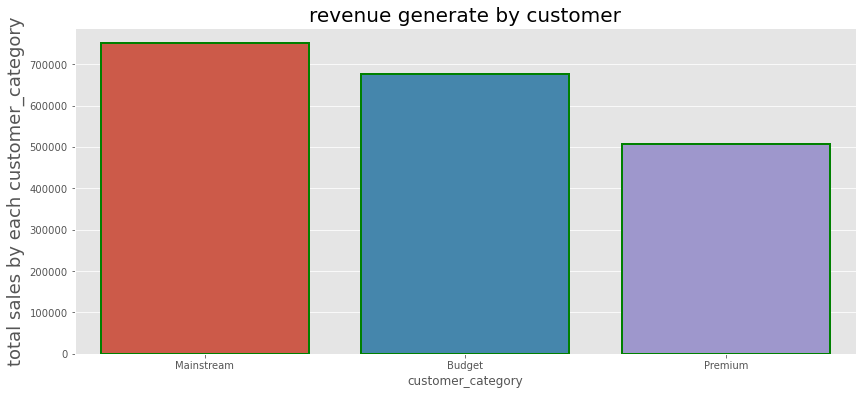

In [64]:
top_product = data.groupby('CUSTOMER_CATEGORY')['SALES'].sum().to_frame('SALES').sort_values('SALES', ascending = False)
figure = plt.figure(figsize=(14,6))
ax = sns.barplot(data = top_product, x = top_product.index, y = top_product.SALES, linewidth = 2, edgecolor = 'green')
plt.title('revenue generate by customer', size=20)
plt.ylabel('total sales by each customer_category', size=18)
plt.xlabel('customer_category')
plt.show()


## revenu generate by top product

In [59]:
products = data.groupby('PRODUCT')['SALES'].sum().to_frame('SALES')
products = products.sort_values('SALES', ascending = False)[:5]
products

,SALES
PRODUCT,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6


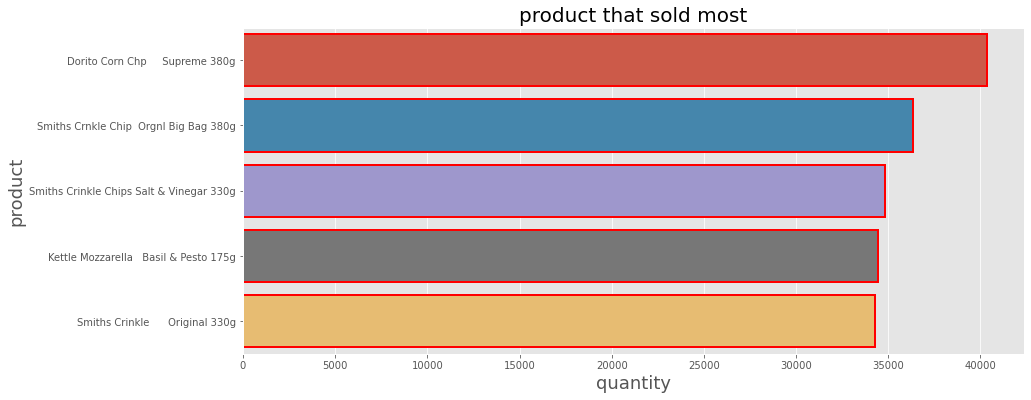

In [65]:
## top 10 products that sold most

fig = plt.figure(figsize=(14,6))
ax = sns.barplot(data = products.iloc[:5], x = products.SALES, y = products.index, linewidth = 2, edgecolor = 'red')
plt.title('product that sold most', size=20)
plt.ylabel('product', size=18)
plt.xlabel('quantity', size=18)
plt.show()

## revenue lifestage catgory 

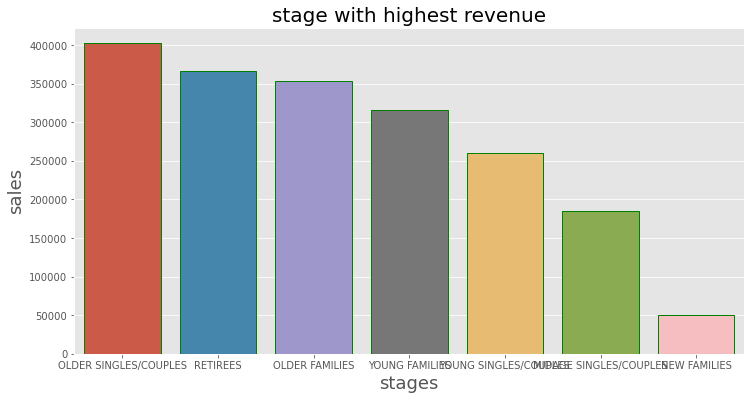

In [67]:
lifestage = data.groupby('LIFESTAGE')['SALES'].sum().to_frame('SALES').sort_values('SALES', ascending=False)
ax = plt.figure(figsize=(12,6))
ax = sns.barplot(data=lifestage, x=lifestage.index, y=lifestage.SALES, linewidth=1, edgecolor='green')
plt.title('stage with highest revenue', size=20)
plt.xlabel('stages', size=18)
plt.ylabel('sales', size=18)
plt.show()

## revenue by customer category

In [148]:
mainstream = data[data['CUSTOMER_CATEGORY'] == 'Mainstream']
mainstream = main.groupby('LIFESTAGE')['PRODUCT'].count().to_frame().sort_values('PRODUCT',ascending=False)
mainstream

,PRODUCT
LIFESTAGE,
RETIREES,21466
YOUNG SINGLES/COUPLES,20854
OLDER SINGLES/COUPLES,18318
OLDER FAMILIES,14244
YOUNG FAMILIES,12907
MIDAGE SINGLES/COUPLES,11874
NEW FAMILIES,2325


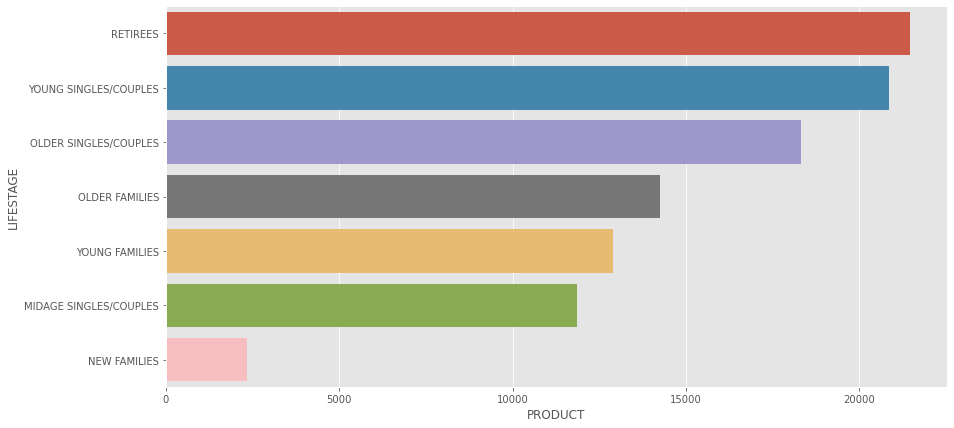

In [153]:
fig = plt.figure(figsize=(14,7))
ax = sns.barplot(x = mainstream.PRODUCT, y= mainstream.index, data = mainstream.iloc[:10])
plt.show()

## showing retirees purchasing power

In [169]:
np = data[data['LIFESTAGE'] == 'RETIREES']
np = np.groupby('PRODUCT')['QUANTITY'].sum().to_frame('QUANTITY')
np.head(10).sort_values(by='QUANTITY',ascending = False)

,QUANTITY
PRODUCT,
Cobs Popd Sea Salt Chips 110g,1252
Cheezels Cheese 330g,1152
Cobs Popd Sour Crm &Chives Chips 110g,1112
CCs Original 175g,516
Cheetos Puffs 165g,501
Burger Rings 220g,492
Cheezels Cheese Box 125g,474
CCs Tasty Cheese 175g,454
CCs Nacho Cheese 175g,427


## showing of customer category by budget products purchasing power

In [171]:
budget = data[data['CUSTOMER_CATEGORY'] == 'Budget']
budget = budget.groupby('LIFESTAGE')['PRODUCT'].count().to_frame().sort_values(by='PRODUCT',ascending=False)
budget.head(10)

,PRODUCT
LIFESTAGE,
OLDER FAMILIES,23160
YOUNG FAMILIES,19122
OLDER SINGLES/COUPLES,18407
RETIREES,15201
YOUNG SINGLES/COUPLES,9242
MIDAGE SINGLES/COUPLES,5020
NEW FAMILIES,3005


## top 10 products purchased most by older families

In [175]:
older_purchasing = data[data['LIFESTAGE'] == 'OLDER FAMILIES']
older_purchasing = older_purchasing.groupby('PRODUCT')['QUANTITY'].sum().to_frame('QUANTITY')
older_purchasing.head(10).sort_values(by='QUANTITY', ascending=False)

,QUANTITY
PRODUCT,
Cobs Popd Sour Crm &Chives Chips 110g,1090
Cheezels Cheese 330g,1016
Cobs Popd Sea Salt Chips 110g,1008
Burger Rings 220g,681
CCs Tasty Cheese 175g,616
CCs Nacho Cheese 175g,611
Cheetos Puffs 165g,607
Cheetos Chs & Bacon Balls 190g,602
CCs Original 175g,597


## premium customer purchasing power

In [183]:
premium = data[data['CUSTOMER_CATEGORY'] == 'Premium']
premium = premium.groupby('LIFESTAGE')['PRODUCT'].count().to_frame('PRODUCT').sort_values(by='PRODUCT',ascending=False)
premium.head(7)

,PRODUCT
LIFESTAGE,
OLDER SINGLES/COUPLES,17754
RETIREES,13096
YOUNG FAMILIES,11563
OLDER FAMILIES,11192
MIDAGE SINGLES/COUPLES,8216
YOUNG SINGLES/COUPLES,6281
NEW FAMILIES,1589


## products purchased most by older singles/couples

In [186]:
older = data[data['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']
older = older.groupby('PRODUCT')['QUANTITY'].sum().to_frame('QUANTITY').sort_values(by='QUANTITY', ascending=False)
older.head(10)


,QUANTITY
PRODUCT,
Kettle 135g Swt Pot Sea Salt,1417
Cobs Popd Sea Salt Chips 110g,1394
Thins Chips Seasonedchicken 175g,1388
Tostitos Splash Of Lime 175g,1378
Doritos Corn Chip Southern Chicken 150g,1366
Infuzions Thai SweetChili PotatoMix 110g,1356
Kettle Sensations Camembert & Fig 150g,1350
Kettle Tortilla ChpsBtroot&Ricotta 150g,1345
Tyrrells Crisps Ched & Chives 165g,1332


In [189]:
data.to_csv('quantium analysis')